In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [2]:
df = pd.read_csv('fake_bills.csv',sep=';')

In [3]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


## Explore Data  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [5]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [6]:
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

C:\Users\Phattaradanai\AppData\Local\Temp\ipykernel_24812\2451159053.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_genuine',data=df,palette='coolwarm')


<Axes: xlabel='is_genuine', ylabel='count'>

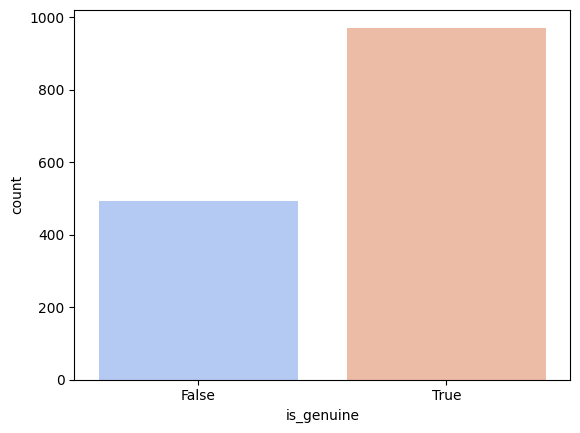

In [9]:
sns.countplot(x='is_genuine',data=df,palette='coolwarm')

## Standardize Variables

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(df.drop('is_genuine',axis=1))

StandardScaler()

In [13]:
scaled = scaler.transform(df.drop('is_genuine',axis=1))

## Split Data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(scaled,df['is_genuine'],
                                                    test_size=0.3)

## Find best K Value 

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
error_rate = []

for i in range(1,40):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

Text(0, 0.5, 'Error Rate')

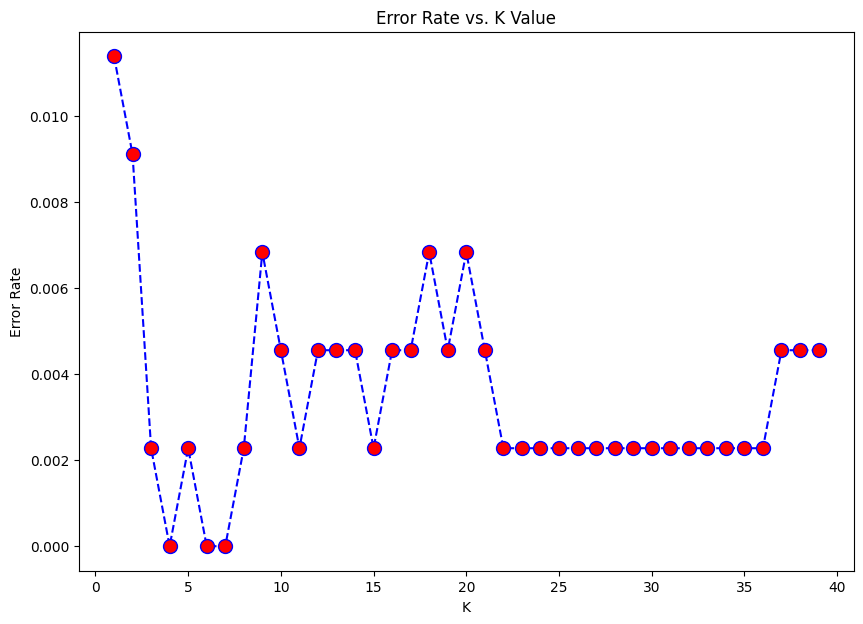

In [18]:
plt.figure(figsize=(10,7))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Build KNN Model

In [19]:
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

## Evaluate Model

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score

In [21]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[147   1]
 [  0 291]]
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       148
        True       1.00      1.00      1.00       291

    accuracy                           1.00       439
   macro avg       1.00      1.00      1.00       439
weighted avg       1.00      1.00      1.00       439



In [22]:
print('Model precision is: ' + str(round(precision_score(y_test,y_pred)*100,0)) + '%')

Model precision is: 100.0%
